# Robomind Academy

Robomind Academy was created to teach (young) persons Computational Thinking. But hand-in-hand with
with this primary goal we as teachers can find out *how* these persons learn Computational Thinking. This will allow us to to improve our teaching methods and research the field coding education.

Robomind Academy collects data about the activity of its users and stores this data for a short period of time. This data is used in the normal operation of the site but an anonymized version of this data is stored for later analysis and research.The anonymized data is stored for a longer period of time and includes things like the number of runs per person per Challenge and when they were run, the Solution in each run used and the performance of the final Solutions. 

## The Data

The core anonymized data is in a compressed JSON format and contains details about the timing, scripts and results of the activities of the persons in the Robomind Academy. The drawback of this detailed, compressed format is that it makes analyzing the data problematic. Therefore the Robomind Academy data was aggregated in a CSV format that just describes the cumulative time a person works on a storyline item and the number of time he or she runs a program before solving the Challenge in the storyline item.

We will use the data from about 5000 students using the Basis1 course in Robomind Academy. This is an introductory course in Computational Thinking. The aggregated data was created by the 'sitting2csv.py' script in this repository. The following logic reads the data and displays the first five rows.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv("data/perf_basis1.gz")

dataset.head()

,storyline,person,cumtime,count
0,Basis_1/Getting started/1,IPupil000126,74.0,1
1,Basis_1/Getting started/1,IPupil000127,183.0,1
2,Basis_1/Getting started/1,IPupil000128,124.0,1
3,Basis_1/Getting started/1,IPupil000129,147.0,3
4,Basis_1/Getting started/1,IPupil000130,56.0,3


As the first five line show the aggregated data contains the name/id of the storyline, the anonymized name/id of the person, the total time the person took before coming up with the solution (cumtime) and the number of runs (count) it took.

## Grading Pupils

In this notebook a grading system for pupils is developed using the aggregated data. 
As a first step we calculate the averages of 'cumtime' and 'count' for each storyline-item.

In [6]:
slis = dataset.groupby(['storyline']).describe()
slis.head()

cumtime                                                    \
                      count        mean         std  min    25%    50%    75%   
storyline                                                                       
Basis_1/Factories/1  8674.0  467.708093  486.102022  0.0  197.0  314.0  545.0   
Basis_1/Factories/2  8592.0   61.758147  160.275859  1.0   18.0   28.0   48.0   
Basis_1/Factories/3  8456.0  205.296003  265.124278  0.0   80.0  130.0  224.0   
Basis_1/Factories/4  8337.0  117.962696  271.250152  0.0   24.0   38.0   72.0   
Basis_1/Factories/5  6494.0  417.477518  515.118824  0.0  140.0  256.0  499.0   

                               count                                       \
                         max   count       mean        std  min  25%  50%   
storyline                                                                   
Basis_1/Factories/1   7438.0  8674.0   7.994236   8.849118  1.0  2.0  5.0   
Basis_1/Factories/2   4255.0  8592.0   1.599162   3.244714  1.0  1.0  1.0   
Basis_1/Factories/3   4473.0  8456.0   5.106197   6.163269  1.0  1.0  3.0   
Basis_1/Factories/4   5314.0  8337.0   3.111431   6.829950  1.0  1.0  1.0   
Basis_1/Factories/5  10877.0  6494.0  10.550354  11.892266  1.0  3.0  7.0   

                                  
                      75%    max  
storyline                         
Basis_1/Factories/1  10.0  151.0  
Basis_1/Factories/2   1.0  110.0  
Basis_1/Factories/3   6.0   84.0  
Basis_1/Factories/4   2.0  138.0  
Basis_1/Factories/5  14.0  158.0

Here we are grading persons based on 'cumtime' or the cummulated time that person has spend on a storyline item before executing a correct Solution.The score is 1 point for a person/storyline_item if the person took longer then the 75% percentile of 'cumtime' (not so good) and 3 points if the person took less then the 25% percentile (fast). In all other cases a score of 2 is assigned.The following code adds and extra 'score' column to our dataset.

In [7]:
# create two python dictionaries to quickly determine scoring lines
twentyfives = {}
seventyfives = {}
for index, row in slis.iterrows():
    twentyfive = row['cumtime']['25%']
    seventyfive = row['cumtime']['75%']
    twentyfives[index] = twentyfive
    seventyfives[index] = seventyfive
# create a new score series
scores = []
for index, row in dataset.iterrows():
    cumtime = row['cumtime']
    if cumtime < twentyfives[row['storyline']]:
        score = 3
    elif cumtime > seventyfives[row['storyline']]:
        score = 1
    else:
        score = 2
    scores.append(score)
# add 'score' column to dataset
dataset['score'] = pd.Series(scores)
dataset.head()

,storyline,person,cumtime,count,score
0,Basis_1/Getting started/1,IPupil000126,74.0,1,3
1,Basis_1/Getting started/1,IPupil000127,183.0,1,2
2,Basis_1/Getting started/1,IPupil000128,124.0,1,2
3,Basis_1/Getting started/1,IPupil000129,147.0,3,2
4,Basis_1/Getting started/1,IPupil000130,56.0,3,3


Now we have scored every storyline item for every person, we can 
calculate an overall score for each person that has completed course Basic1.

(array([ 22.,  99., 232., 317., 305., 231., 158.,  63.,  23.,  23.]),
 array([1.29545455, 1.46590909, 1.63636364, 1.80681818, 1.97727273,
        2.14772727, 2.31818182, 2.48863636, 2.65909091, 2.82954545,
        3.        ]),
 <a list of 10 Patch objects>)

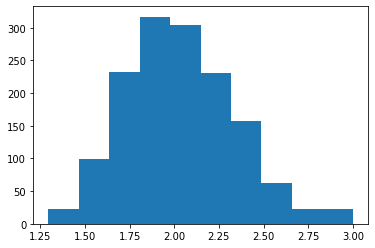

In [8]:
scoresbasis1 = dataset[['person','score']].groupby(['person']).describe()
scoresbasis1 = scoresbasis1[scoresbasis1['score']['count']>40]
scoresmean = scoresbasis1['score']['mean']
plt.hist(scoresmean)

This looks ok except for the weird peek at the perfect score. This turns out the be some kids getting hold of the answer book. 

In [2]:
import os
os.system("jupyter nbconvert --to pdf Basis1.ipynb")


256